## 02 Exercise with perceptron
Find the optimal weights for the two [dimensional dataset](data/rodents.csv) to seperate mice from rats based on data about height and weight. This is a superviced dataset with labels that can be found in the data folder (in this repo)
![](../../images/rodents.png)

### Part one: general
1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5
2. Change the perceptron method from the notebook to use the [numpy.dot() method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) in line 12 instead of the lengthy sum() function

### Part two: rodent data
1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats:
```
[[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
```
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

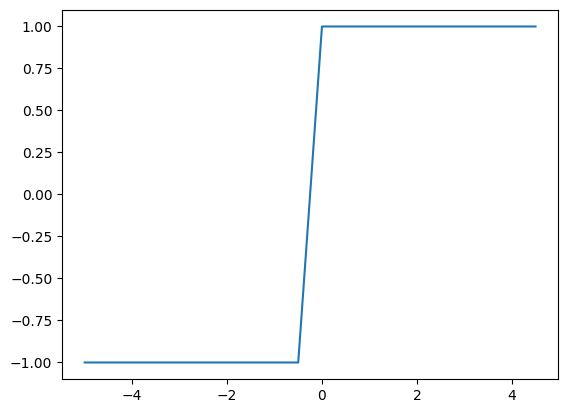

In [9]:
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1

rnge = np.arange(-5, 5, 0.5)
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)

In [10]:
def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights,
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

out = perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

In [41]:
data = pd.read_csv("../../data/rodents.csv", sep=";")
data.head()

,weight,height,type
0,233.479920,23.514130,rat
1,231.324467,26.033830,rat
2,17.906954,6.846577,mouse
3,230.276523,24.077800,rat
4,20.360593,6.605983,mouse


In [46]:
copy_data = data.copy()
copy_data.type[copy_data.type == "rat"] = 1
copy_data.type[copy_data.type == "mouse"] = -1

copy_data.dropna()
copy_data

/var/folders/d_/nvsh3vcj5011gnz48wmh440w0000gn/T/ipykernel_7019/1184891337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data.type[copy_data.type == "rat"] = 1
/var/folders/d_/nvsh3vcj5011gnz48wmh440w0000gn/T/ipykernel_7019/1184891337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data.type[copy_data.type == "mouse"] = -1


,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
...,...,...,...
244,20.614362,6.575722,-1
245,22.249846,6.951267,-1
246,228.568162,27.146987,1
247,229.002922,23.526073,1


In [54]:
new_animals = np.array([[231.32446731816555,26.03382997978225],
          [17.906954059999567,6.846576762459397],
          [230.276522831171,24.077799766119398]])

new_weights = [40, -190]
for a in new_animals:

    new_out = perceptron(new_weights, new_animals)
new_out

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)